In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

: 

In [2]:
start='2010-01-01'
end='2019-12-31'

df=data.DataReader('AAPL','yahoo',start,end)
df.head

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.415356
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.515213
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.526477
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.422663
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.410792


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.623222
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.004585
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,70.977638
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.398895
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,71.920570


In [4]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.415356
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.515213
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.526477
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.422663
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.410792


In [5]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


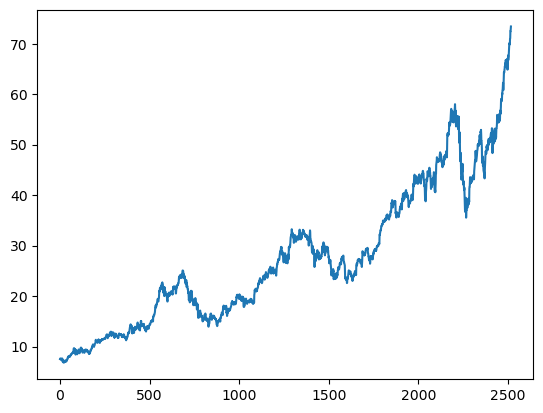

In [6]:
plt.plot(df.Close)

In [7]:
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
2512,71.222504,70.730003,71.172501,71.067497,48478800.0
2513,72.495003,71.175003,71.205002,72.477501,93121200.0
2514,73.492500,72.029999,72.779999,72.449997,146266000.0
2515,73.172501,71.305000,72.364998,72.879997,144114400.0


In [8]:
ma100=df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64

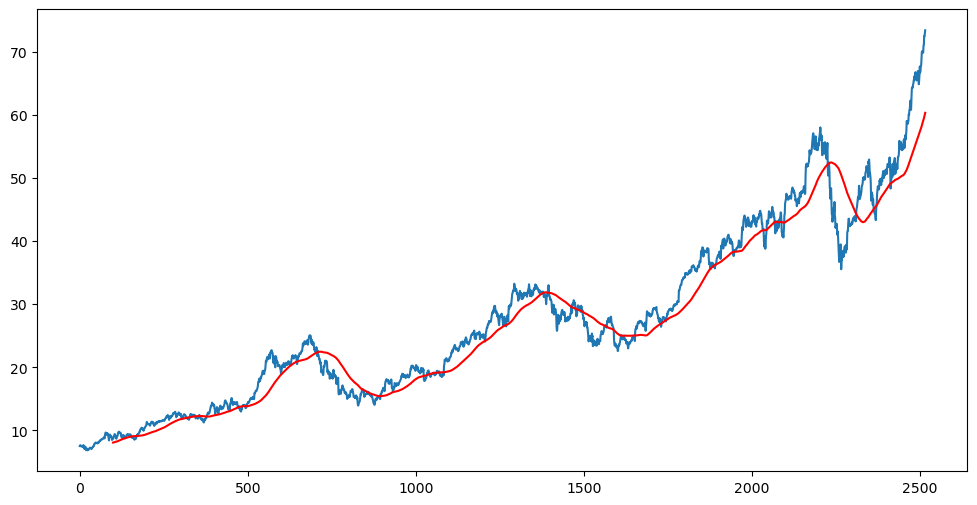

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [11]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
2516    54.793137
Name: Close, Length: 2517, dtype: float64

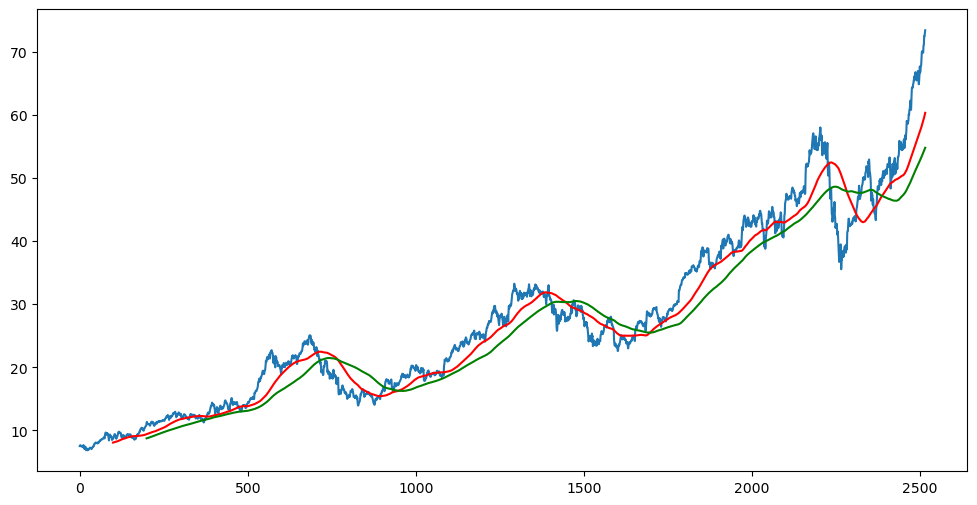

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [13]:
df.shape

(2517, 5)

In [14]:
#Splitting Data into Training and Testing

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(756, 1)


In [15]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [16]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [19]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [20]:
data_training_array.shape

(1761, 1)

In [22]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [27]:
x_train.shape

(1661, 100, 1)

In [23]:
#ML Model

In [26]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [28]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [30]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 [==============================] - 34s 377ms/step - loss: 0.0606
Epoch 2/50
52/52 [==============================] - 19s 358ms/step - loss: 0.0118
Epoch 3/50
52/52 [==============================] - 19s 362ms/step - loss: 0.0105
Epoch 4/50
52/52 [==============================] - 18s 353ms/step - loss: 0.0104
Epoch 5/50
52/52 [==============================] - 18s 352ms/step - loss: 0.0091
Epoch 6/50
52/52 [==============================] - 19s 366ms/step - loss: 0.0086
Epoch 7/50
52/52 [==============================] - 18s 353ms/step - loss: 0.0070
Epoch 8/50
52/52 [==============================] - 18s 351ms/step - loss: 0.0077
Epoch 9/50
52/52 [==============================] - 18s 350ms/step - loss: 0.0070
Epoch 10/50
52/52 [==============================] - 18s 352ms/step - loss: 0.0063
Epoch 11/50
52/52 [==============================] - 18s 351ms/step - loss: 0.0066
Epoch 12/50
52/52 [==============================] - 18s 351ms/step - loss: 0.0071
Epoch 13/50
5

In [31]:
model.save('keras_model.h5')

In [32]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [33]:
data_training.tail(100)

,Close
1661,27.092501
1662,27.202499
1663,27.000000
1664,26.982500
1665,27.045000
...,...
1756,29.264999
1757,29.072500
1758,29.129999
1759,29.315001


In [34]:
past_100_days=data_training.tail(100)

In [37]:
final_df=past_100_days.append(data_testing, ignore_index=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_4332\351597942.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing, ignore_index=True)


In [38]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [39]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.0275037 ],
       [0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.072

In [40]:
input_data.shape

(856, 1)

In [44]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [47]:
x_test, y_test=np.array(x_test,dtype=object).astype('float32'), np.array(y_test,dtype=object).astype('float32')
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [48]:
#Making Prediction

y_predicted=model.predict(x_test)

24/24 [==============================] - 5s 130ms/step


In [49]:
y_predicted.shape

(756, 1)

In [50]:
y_test

array([0.07138362, 0.06660719, 0.0683393 , 0.06765693, 0.07075375,
       0.07757719, 0.08324586, 0.08387573, 0.08723495, 0.08461056,
       0.08350831, 0.08854715, 0.08849465, 0.08739241, 0.08854715,
       0.08896706, 0.08838969, 0.09841487, 0.09872982, 0.09878228,
       0.09710266, 0.09563302, 0.13447408, 0.13331935, 0.1362062 ,
       0.14255719, 0.14906573, 0.15174258, 0.15373714, 0.15216249,
       0.15830357, 0.16738404, 0.1699559 , 0.16911615, 0.17105818,
       0.17620197, 0.178354  , 0.17530969, 0.17599206, 0.17740917,
       0.17772417, 0.19242072, 0.18806429, 0.19236827, 0.19005878,
       0.1910036 , 0.18827422, 0.18659456, 0.18900904, 0.18932396,
       0.18822175, 0.19593748, 0.19714469, 0.19347055, 0.20118628,
       0.19268318, 0.20097628, 0.19835189, 0.19688223, 0.19814198,
       0.21346843, 0.215148  , 0.21415073, 0.21273361, 0.21294352,
       0.21855977, 0.21462318, 0.21273361, 0.21105395, 0.21016167,
       0.20207857, 0.20297085, 0.19903426, 0.20312831, 0.19982

In [51]:
y_predicted

array([[0.13770236],
       [0.13889259],
       [0.13993809],
       [0.14079985],
       [0.1414559 ],
       [0.14190727],
       [0.14218849],
       [0.14236458],
       [0.14250986],
       [0.14269641],
       [0.14297627],
       [0.14337309],
       [0.14389774],
       [0.14454973],
       [0.14531164],
       [0.14615569],
       [0.14704925],
       [0.14795591],
       [0.14886343],
       [0.14975224],
       [0.15062165],
       [0.15147811],
       [0.15231669],
       [0.15319556],
       [0.15421316],
       [0.15546218],
       [0.15702376],
       [0.15896575],
       [0.16133305],
       [0.16413948],
       [0.16735807],
       [0.17093576],
       [0.17481416],
       [0.17892867],
       [0.1832026 ],
       [0.18755344],
       [0.19189547],
       [0.19615912],
       [0.20027812],
       [0.20419395],
       [0.20786098],
       [0.21124592],
       [0.21435997],
       [0.21722233],
       [0.21986344],
       [0.2223086 ],
       [0.22457883],
       [0.226

In [52]:
scaler.scale_

array([0.02099517])

In [53]:
scale_factor=1/0.02099517
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

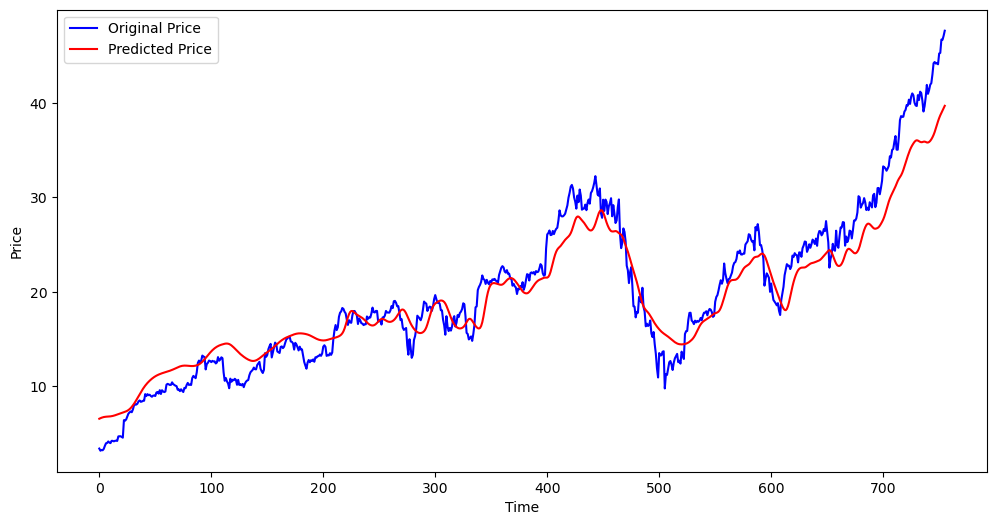

In [55]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label="Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()